In [1]:
import pygrib
import numpy as np
from numpy import fft
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
from metpy.units import units

In [2]:
#gfs on 1degree lat/lon grid from NOMADS server in grib2 format
#obtained from https://nomads.ncep.noaa.gov/pub/data/nccf/com/gfs/prod/gfs.20200812/00/
#use get_gfs.csh
date = '20200921' # YYYYMMDD
modelRun = '00' # HH
#specify forecast hour of file
forecastHour = '000' # HHH
#local path
#change to the file in your directory
path='/uufs/chpc.utah.edu/common/home/u0035056/atmos6010/data/'+date+modelRun
gFile = '/gfs.t'+modelRun+'z.pgrb2.1p00.f'+forecastHour+'.grib2'

#open file using pygrib
grbs = pygrib.open(path+gFile)
#what is in the file?
for g in grbs:
  print (g.typeOfLevel, g.level, g.name, g.shortName,g.validDate, g.analDate, g.forecastTime)

hybrid 1 Cloud mixing ratio clwmr 2020-09-21 00:00:00 2020-09-21 00:00:00 0
hybrid 1 Ice water mixing ratio icmr 2020-09-21 00:00:00 2020-09-21 00:00:00 0
hybrid 1 Rain mixing ratio rwmr 2020-09-21 00:00:00 2020-09-21 00:00:00 0
hybrid 1 Snow mixing ratio snmr 2020-09-21 00:00:00 2020-09-21 00:00:00 0
hybrid 1 Graupel (snow pellets) grle 2020-09-21 00:00:00 2020-09-21 00:00:00 0
atmosphere 0 Maximum/Composite radar reflectivity refc 2020-09-21 00:00:00 2020-09-21 00:00:00 0
surface 0 Visibility vis 2020-09-21 00:00:00 2020-09-21 00:00:00 0
unknown 0 U component of wind u 2020-09-21 00:00:00 2020-09-21 00:00:00 0
unknown 0 V component of wind v 2020-09-21 00:00:00 2020-09-21 00:00:00 0
unknown 0 Ventilation Rate VRATE 2020-09-21 00:00:00 2020-09-21 00:00:00 0
surface 0 Wind speed (gust) gust 2020-09-21 00:00:00 2020-09-21 00:00:00 0
isobaricInPa 40 Geopotential Height gh 2020-09-21 00:00:00 2020-09-21 00:00:00 0
isobaricInPa 40 Temperature t 2020-09-21 00:00:00 2020-09-21 00:00:00 0
iso

isobaricInhPa 200 Temperature t 2020-09-21 00:00:00 2020-09-21 00:00:00 0
isobaricInhPa 200 Relative humidity r 2020-09-21 00:00:00 2020-09-21 00:00:00 0
isobaricInhPa 200 Total Cloud Cover tcc 2020-09-21 00:00:00 2020-09-21 00:00:00 0
isobaricInhPa 200 Vertical velocity w 2020-09-21 00:00:00 2020-09-21 00:00:00 0
isobaricInhPa 200 Geometric vertical velocity wz 2020-09-21 00:00:00 2020-09-21 00:00:00 0
isobaricInhPa 200 U component of wind u 2020-09-21 00:00:00 2020-09-21 00:00:00 0
isobaricInhPa 200 V component of wind v 2020-09-21 00:00:00 2020-09-21 00:00:00 0
isobaricInhPa 200 Absolute vorticity absv 2020-09-21 00:00:00 2020-09-21 00:00:00 0
isobaricInhPa 200 Cloud mixing ratio clwmr 2020-09-21 00:00:00 2020-09-21 00:00:00 0
isobaricInhPa 200 Ice water mixing ratio icmr 2020-09-21 00:00:00 2020-09-21 00:00:00 0
isobaricInhPa 200 Rain mixing ratio rwmr 2020-09-21 00:00:00 2020-09-21 00:00:00 0
isobaricInhPa 200 Snow mixing ratio snmr 2020-09-21 00:00:00 2020-09-21 00:00:00 0
isobar

isobaricInhPa 600 Geometric vertical velocity wz 2020-09-21 00:00:00 2020-09-21 00:00:00 0
isobaricInhPa 600 U component of wind u 2020-09-21 00:00:00 2020-09-21 00:00:00 0
isobaricInhPa 600 V component of wind v 2020-09-21 00:00:00 2020-09-21 00:00:00 0
isobaricInhPa 600 Absolute vorticity absv 2020-09-21 00:00:00 2020-09-21 00:00:00 0
isobaricInhPa 600 Cloud mixing ratio clwmr 2020-09-21 00:00:00 2020-09-21 00:00:00 0
isobaricInhPa 600 Ice water mixing ratio icmr 2020-09-21 00:00:00 2020-09-21 00:00:00 0
isobaricInhPa 600 Rain mixing ratio rwmr 2020-09-21 00:00:00 2020-09-21 00:00:00 0
isobaricInhPa 600 Snow mixing ratio snmr 2020-09-21 00:00:00 2020-09-21 00:00:00 0
isobaricInhPa 600 Graupel (snow pellets) grle 2020-09-21 00:00:00 2020-09-21 00:00:00 0
isobaricInhPa 650 Geopotential Height gh 2020-09-21 00:00:00 2020-09-21 00:00:00 0
isobaricInhPa 650 Temperature t 2020-09-21 00:00:00 2020-09-21 00:00:00 0
isobaricInhPa 650 Relative humidity r 2020-09-21 00:00:00 2020-09-21 00:00:00

isobaricInhPa 950 V component of wind v 2020-09-21 00:00:00 2020-09-21 00:00:00 0
isobaricInhPa 950 Absolute vorticity absv 2020-09-21 00:00:00 2020-09-21 00:00:00 0
isobaricInhPa 950 Cloud mixing ratio clwmr 2020-09-21 00:00:00 2020-09-21 00:00:00 0
isobaricInhPa 950 Ice water mixing ratio icmr 2020-09-21 00:00:00 2020-09-21 00:00:00 0
isobaricInhPa 950 Rain mixing ratio rwmr 2020-09-21 00:00:00 2020-09-21 00:00:00 0
isobaricInhPa 950 Snow mixing ratio snmr 2020-09-21 00:00:00 2020-09-21 00:00:00 0
isobaricInhPa 950 Graupel (snow pellets) grle 2020-09-21 00:00:00 2020-09-21 00:00:00 0
surface 0 Haines Index hindex 2020-09-21 00:00:00 2020-09-21 00:00:00 0
isobaricInhPa 975 Geopotential Height gh 2020-09-21 00:00:00 2020-09-21 00:00:00 0
isobaricInhPa 975 Temperature t 2020-09-21 00:00:00 2020-09-21 00:00:00 0
isobaricInhPa 975 Relative humidity r 2020-09-21 00:00:00 2020-09-21 00:00:00 0
isobaricInhPa 975 Total Cloud Cover tcc 2020-09-21 00:00:00 2020-09-21 00:00:00 0
isobaricInhPa 97

potentialVorticity 2 Temperature t 2020-09-21 00:00:00 2020-09-21 00:00:00 0
potentialVorticity 2 Geopotential Height gh 2020-09-21 00:00:00 2020-09-21 00:00:00 0
potentialVorticity 2 Pressure pres 2020-09-21 00:00:00 2020-09-21 00:00:00 0
potentialVorticity 2 Vertical speed shear vwsh 2020-09-21 00:00:00 2020-09-21 00:00:00 0
potentialVorticity 2147486 U component of wind u 2020-09-21 00:00:00 2020-09-21 00:00:00 0
potentialVorticity 2147486 V component of wind v 2020-09-21 00:00:00 2020-09-21 00:00:00 0
potentialVorticity 2147486 Temperature t 2020-09-21 00:00:00 2020-09-21 00:00:00 0
potentialVorticity 2147486 Geopotential Height gh 2020-09-21 00:00:00 2020-09-21 00:00:00 0
potentialVorticity 2147486 Pressure pres 2020-09-21 00:00:00 2020-09-21 00:00:00 0
potentialVorticity 2147486 Vertical speed shear vwsh 2020-09-21 00:00:00 2020-09-21 00:00:00 0
meanSea 0 Pressure reduced to MSL prmsl 2020-09-21 00:00:00 2020-09-21 00:00:00 0
isobaricInhPa 500 5-wave geopotential height 5wavh 202

In [3]:
# get 850 hPa temperature which is in K
t = grbs.select(shortName='t',level=850)
t_all = (t[0].values)
print(np.nanmin(t_all),np.nanmax(t_all))
#what are the dimensions? note lat first, lon second
print(np.shape(t_all))
# Get the lat/lon grids from the grib2 file
lats_all, lons_all = t[0].latlons()
# get 850 hPa u wind
u = grbs.select(shortName='u',level=850)
# Extract the values
u_all = u[0].values
# get 850 hPa v wind
v = grbs.select(shortName='v',level=850)
# Extract the values
v_all = v[0].values
grbs.close()


232.27782 303.4778
(181, 360)


In [4]:
# show entire temperature field unprojected to verify the raw data
#fig,ax = plt.subplots(figsize=(20,5))
# Plot temperature field
#cs=ax.contour(lons_all,lats_all,t_all,colors='black')
#plt.clabel(cs,fmt='%0.f',inline=True)
#plt.show()

In [5]:
#make the data more manageable in this case for a NH projection
#upper left corner lat/lon
ult = 90
uln = 0
#lower right corner lat/lon
rlt = 20
rln = 360
#convert lat/lons to grid indices
ulti = 90-ult
ulni = uln
rlti = 90-rlt
rlni = rln

#truncate the arrays and convert temp to C
t85 = -273.15 + t_all[ulti:rlti,ulni:rlni]
u85 = u_all[ulti:rlti,ulni:rlni]
v85 = v_all[ulti:rlti,ulni:rlni]
lats = lats_all[ulti:rlti,ulni:rlni]
lons = lons_all[ulti:rlti,ulni:rlni]

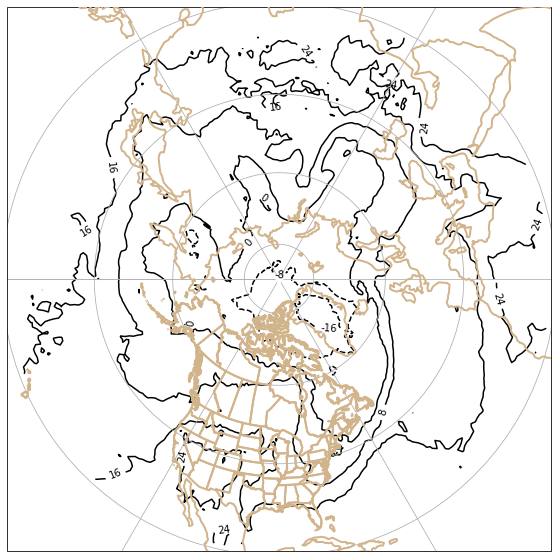

In [6]:
#plot for northern hemisphere projection as a test
#setup projection
#plot as polar stereographic
mapcrs = ccrs.NorthPolarStereo(central_longitude=-90)
states = cartopy.feature.NaturalEarthFeature(
            category='cultural', scale='50m', facecolor='none',
            name='admin_1_states_provinces_shp')
# Set up the projection for the data
datacrs = ccrs.PlateCarree()
#plot the temperature for the northern hemisphere
fig,ax = plt.subplots(figsize=(10,10),subplot_kw={'projection': mapcrs})
# Plot temperature field
cs=ax.contour(lons,lats,t85,colors='black',transform=ccrs.PlateCarree())
ax.add_feature(states,edgecolor='tan',zorder=99,linewidth=2)
ax.add_feature(cfeature.COASTLINE,edgecolor='tan',zorder=99,linewidth=2)
ax.gridlines(draw_labels=False)
plt.clabel(cs,fmt='%0.f',inline=True)
plt.show()

In [7]:
#setup projection for more local domain
#plot as lambert conformal
mapcrs = ccrs.LambertConformal(central_longitude=-97.5,
                               central_latitude=38.5,
                               standard_parallels=(30, 60))

states = cartopy.feature.NaturalEarthFeature(
            category='cultural', scale='50m', facecolor='none',
            name='admin_1_states_provinces_shp')
# Set up the projection for the data
datacrs = ccrs.PlateCarree()
# color maps
rcol = mcm.get_cmap('YlOrBr')
bcol = mcm.get_cmap('GnBu_r')

In [8]:
#compute temperature advection
# use metpy functions to do the 'heavy lifting'
#https://unidata.github.io/MetPy/
#find the increments in each direction on the grid
dx, dy = mpcalc.lat_lon_grid_deltas(lons,lats)
t85 = t85 * units.degC
u85 = u85 * units('m/s')
v85 = v85 * units('m/s')
t85s = t85
#smooth fields to reduce chatter
#t85s = mpcalc.smooth_gaussian(t85,5)
print(np.nanmin(t85s.m),np.nanmax(t85s.m))
tadv_850=mpcalc.advection(t85s,(u85,v85),(dx,dy),dim_order='yx')
#convert to C/(6 h)
tadv_850 = 6*3600 * tadv_850
print(np.nanmin(tadv_850.m),np.nanmax(tadv_850.m))
tadv_r = np.nanmax(tadv_850.m)-np.nanmin(tadv_850.m)
tadv_int = (tadv_r/8)
print(tadv_int)
#since extreme values possible, fix the interval to be a bit more reasonable
tadv_int = int(tadv_int/2)

-22.472183 30.32782
-37.27930511516057 16.71377240133743
6.74913468956225


/uufs/chpc.utah.edu/common/home/u0035056/anaconda3/envs/atmos6010/lib/python3.7/site-packages/pint/quantity.py:1190: RuntimeWarning: invalid value encountered in true_divide
  magnitude = magnitude_op(new_self._magnitude, other._magnitude)


positive range(3, 12, 3)
negative range(-12, -3, 3)
2020-09-21 00:00:00


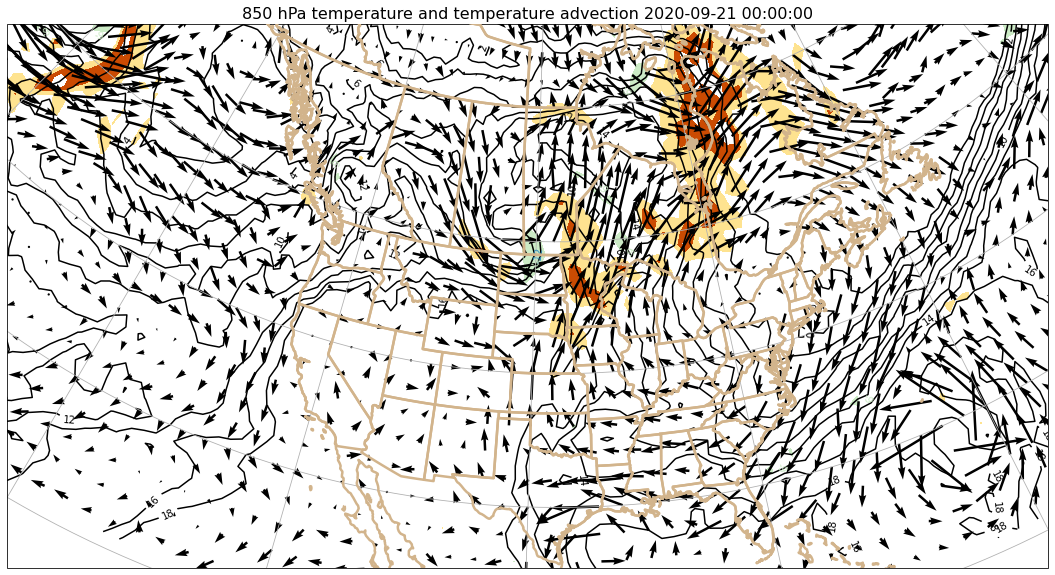

In [9]:
#plot the temperature, temperature advection and winds 
fig,ax = plt.subplots(figsize=(20,10),subplot_kw={'projection': mapcrs})
ax.set_extent([-140,-60,20,60])
# Plot temperature field
cs=ax.contour(lons,lats,t85s.m,levels=range(0,20,2),transform=ccrs.PlateCarree(),colors='black')
plt.clabel(cs,fmt='%0.f',inline=True)
#plot temperature advection
# fill pos tadv
ta_lev=range(tadv_int,tadv_int*4,tadv_int)
print('positive',ta_lev)
cs = plt.contourf(lons,lats,tadv_850,cmap=rcol,levels=ta_lev,transform=ccrs.PlateCarree())
# fill neg  temp advection
ta_lev=range(-tadv_int*4,-tadv_int,tadv_int)
print('negative',ta_lev)
cs = plt.contourf(lons,lats,tadv_850,cmap=bcol,levels=ta_lev,transform=ccrs.PlateCarree())

#plot every third wind vector
skip=(slice(None,None,2),slice(None,None,2))
plt.quiver(lons[skip],lats[skip],u85.m[skip],v85.m[skip],scale=30, scale_units='inches',pivot='tail',color='black',transform=ccrs.PlateCarree())
#ax.streamplot(lons,lats, u85.m,v85.m,transform=datacrs,arrowsize=1,color='green')
#cb=plt.colorbar(cs)
plt.clabel(cs,fmt='%0.f',inline=True)
print(g.validDate)
ax.add_feature(states,edgecolor='tan',zorder=99,linewidth=2.5)
ax.add_feature(cfeature.COASTLINE,edgecolor='tan',zorder=99,linewidth=2.5)
ax.gridlines(draw_labels=False)
ax.set_title('850 hPa temperature and temperature advection %s' % g.validDate, fontsize=16)
plot_file = '../figs/gfs_850_temp_adv_' + date + modelRun + forecastHour + '.png'
plt.savefig(plot_file)
plt.show()